In [886]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [903]:
img=cv2.imread('Data/test.jpg')

In [904]:
img.shape

(2448, 3264, 3)

In [905]:
img=cv2.resize(img,(1500,880))
img_copy=img.copy()

In [906]:
img.shape[0]

880

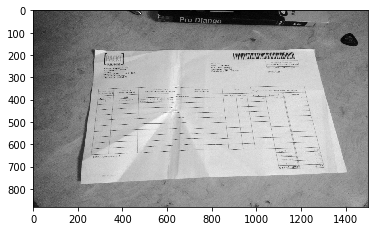

In [907]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [908]:
sigma=0.33
med_val=np.median(img)
lower = int(max(0,(1.0-sigma)*med_val))
upper = int(min(255,(1.0+sigma)*med_val))
blurred=cv2.GaussianBlur(gray,(5,5),0)
edged=cv2.Canny(blurred,lower-60,upper) 
print(med_val)

115.0


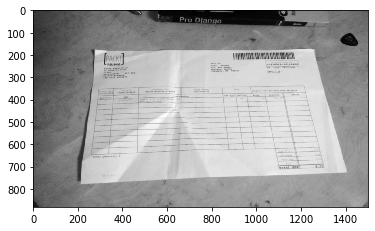

In [909]:
plt.imshow(blurred,cmap='gray')

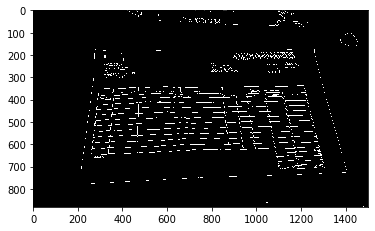

In [910]:
plt.imshow(edged,cmap='gray')

In [911]:
contours,hierarchy= cv2.findContours(edged,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [912]:
# SORT THE CONTOURS ACCORDING TO HIGHEST AREA FIRST
contours=sorted(contours,key=cv2.contourArea,reverse=True)

In [913]:
for i in contours:
    perimeter=cv2.arcLength(i,True)  # 2nd arguement: whether contour is closed or not
    eplison=0.02 * perimeter  # 2% of the perimeter
    approx=cv2.approxPolyDP(i,eplison,True) # Contour approximation
    
    if len(approx)==4:
        target=approx
        break

In [914]:
cv2.drawContours(img,[target],-1,(0,255,0),10)

array([[[35, 45, 63],
        [35, 46, 57],
        [29, 43, 50],
        ...,
        [22, 51, 78],
        [23, 53, 79],
        [26, 53, 79]],

       [[26, 36, 48],
        [29, 40, 50],
        [22, 33, 42],
        ...,
        [31, 56, 89],
        [28, 55, 87],
        [32, 56, 89]],

       [[30, 39, 51],
        [30, 38, 52],
        [28, 37, 51],
        ...,
        [31, 55, 91],
        [32, 57, 93],
        [39, 61, 97]],

       ...,

       [[ 6, 18, 24],
        [12, 24, 30],
        [ 6, 18, 24],
        ...,
        [40, 63, 79],
        [47, 67, 84],
        [45, 65, 81]],

       [[ 6, 17, 24],
        [10, 19, 27],
        [ 9, 19, 26],
        ...,
        [46, 68, 81],
        [42, 65, 83],
        [41, 66, 79]],

       [[13, 23, 33],
        [12, 22, 31],
        [ 7, 19, 25],
        ...,
        [38, 58, 75],
        [37, 62, 82],
        [32, 62, 76]]], dtype=uint8)

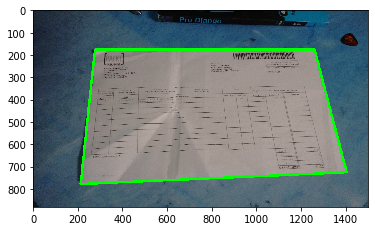

In [915]:
plt.imshow(img)

In [916]:
target=target.reshape((4,2))
target_new=np.zeros((4,2),dtype=np.float32)
add=target.sum(1)
diff=np.diff(target,axis=1)


target_new[0]=target[np.argmin(add)]
target_new[2]=target[np.argmax(add)]
target_new[1]=target[np.argmin(diff)]
target_new[3]=target[np.argmax(diff)]

In [917]:
pts2=np.float32([[0,0],[800,0],[800,800],[0,800]])
perspective_trans= cv2.getPerspectiveTransform(target_new,pts2)
warped=cv2.warpPerspective(img_copy,perspective_trans,(800,800))
warped=cv2.cvtColor(warped,cv2.COLOR_BGR2GRAY)

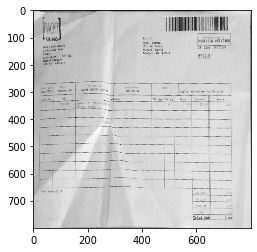

In [918]:
plt.imshow(warped,cmap='gray')